# Understanding Descriptive Statistics

Import the necessary libraries here:

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [28]:
def rolling_dice(): 
    mylist = [1,2,3,4,5,6]
    df = pd.DataFrame(random.choices(mylist, weights = [1,1,1,1,1,1], k = 10))
    return df

In [29]:
df=rolling_dice()
df

,0
0,2
1,6
2,4
3,6
4,4
5,5
6,3
7,2
8,1
9,4


#### 2.- Plot the results sorted by value.

(array([1., 0., 2., 0., 1., 0., 3., 0., 1., 2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

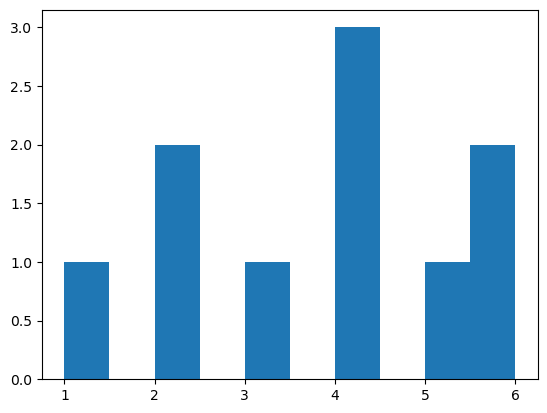

In [30]:
plt.hist(df)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [ ]:
"""
it will be the same, only the scale on y axis will change
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [216]:
def mean_ex(df):
    return df.sum()/df.value_counts().sum()

In [53]:
mean(df)

0    3.7
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [103]:
counts= df.value_counts()

In [104]:
counts

0
1    1
2    2
3    1
4    3
5    1
6    2
dtype: int64

In [105]:
counts=pd.DataFrame(counts)
counts

,0
0,
1,1
2,2
3,1
4,3
5,1
6,2


In [106]:
counts["Mean"]="try"

In [107]:
counts

,0,Mean
0,,
1,1,try
2,2,try
3,1,try
4,3,try
5,1,try
6,2,try


In [110]:
counts.index

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64', name=0)

In [111]:
counts["chiffre"]=counts.index

In [112]:
counts

,0,Mean,chiffre
0,,,
1,1,try,1
2,2,try,2
3,1,try,3
4,3,try,4
5,1,try,5
6,2,try,6


In [114]:
counts["Mean"]=counts[0]*counts["chiffre"]

In [115]:
counts

,0,Mean,chiffre
0,,,
1,1,1,1
2,2,4,2
3,1,3,3
4,3,12,4
5,1,5,5
6,2,12,6


In [117]:
mean = counts["Mean"].sum()/counts[0].sum()

In [118]:
mean

3.7

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [141]:
df

,0
0,3
1,4
2,5
3,4
4,2
5,4
6,2
7,1
8,3
9,2


In [169]:
def median(df):
    df=list(df[0])
    df.sort()
    if len(df)%2==0:
        first_median=df[(len(df)//2)-1]
        second_median=df[len(df)//2]
        median=(first_median+second_median)/2
    else : 
        median=df[len(df)//2]
    return median
        

In [151]:
list(df[0])

[3, 4, 5, 4, 2, 4, 2, 1, 3, 2]

In [170]:
median(df)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [180]:
def quartiles(df):
    df=list(df[0])
    df.sort()
    if len(df)%2==0:
        first_median=df[len(df)//2]
        second_median=df[(len(df)//2)+1]
        median=(first_median+second_median)/2
        first_q=df[len(df)//4]
        first_q_2=df[(len(df)//4)+1]
        first_quartile=(first_q+first_q_2)/2
        third_q=df[((len(df)//4)*3)-1]
        third_q_2=df[(len(df)//4)*3]
        third_quartile=(third_q+third_q_2)/2
        fourth_quartile=df[len(df)-1]
    else : 
        median=df[len(df)//2]
        first_quartile=df[(len(df)//4)+1]
        third_quartile=df[((len(df)//4)*3)+1]
        fourth_quartile=df[len(df)-1]
    return first_quartile, median, third_quartile, fourth_quartile

In [159]:
df

,0
0,3
1,4
2,5
3,4
4,2
5,4
6,2
7,1
8,3
9,2


In [165]:
test=list(df[0])

In [166]:
sorted(test)

[1, 2, 2, 2, 3, 3, 4, 4, 4, 5]

In [181]:
quartiles(df)

(2.0, 3.5, 3.5, 5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [223]:
data=pd.read_csv("/Users/clemence/IRONHACK/Labs-Ironhack/module_2/Lab_4_Descriptive-Statistics/roll_the_dice_hundred.csv",index_col="roll")
data

,Unnamed: 0,value
roll,,
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1


In [212]:
sorted = data.sort_values("value")
sorted

,Unnamed: 0,value
roll,,
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
...,...,...
17,17,6
11,11,6
24,24,6


In [ ]:
data.plot(x="value",y="")

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  100 non-null    int64
 1   value       100 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


In [217]:
mean_ex(data)

Unnamed: 0    49.50
value          3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [224]:
freq = data.groupby(['value']).count() 
print(freq)

       Unnamed: 0
value            
1              12
2              17
3              14
4              22
5              12
6              23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:xlabel='value'>

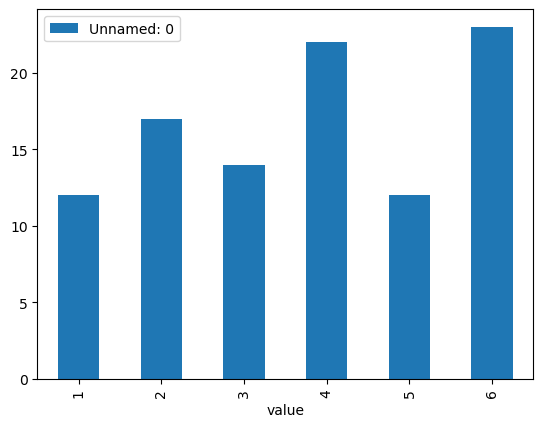

In [229]:
fig, ax = plt.subplots()
freq.plot(ax=ax, kind='bar')

In [ ]:
"""

"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [236]:
dice_1000=pd.read_csv("/Users/clemence/IRONHACK/Labs-Ironhack/module_2/Lab_4_Descriptive-Statistics/roll_the_dice_thousand.csv",index_col="roll")
dice_1000

,Unnamed: 0,value
roll,,
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5
...,...,...
995,995,1
996,996,4
997,997,4


In [237]:
freq = dice_1000.groupby(['value']).count() 
print(freq)

       Unnamed: 0
value            
1             175
2             167
3             175
4             168
5             149
6             166


<AxesSubplot:xlabel='value'>

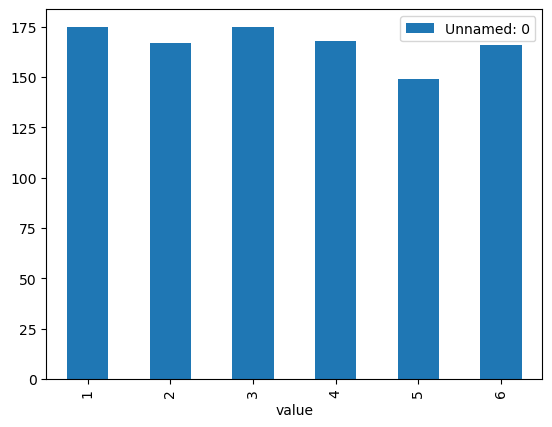

In [238]:
fig, ax = plt.subplots()
freq.plot(ax=ax, kind='bar')

In [ ]:
"""
the frequencies are more uniformed
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [239]:
data=pd.read_csv("/Users/clemence/IRONHACK/Labs-Ironhack/module_2/Lab_4_Descriptive-Statistics/ages_population.csv")

In [240]:
data

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [265]:
freq = pd.DataFrame(data['observation'].value_counts())
print(freq) 

      observation
39.0           45
41.0           36
30.0           34
35.0           33
43.0           32
...           ...
73.0            1
82.0            1
70.0            1
71.0            1
69.0            1

[72 rows x 1 columns]


In [266]:
freq=freq.sort_index(axis = 0, ascending = True)

<AxesSubplot:>

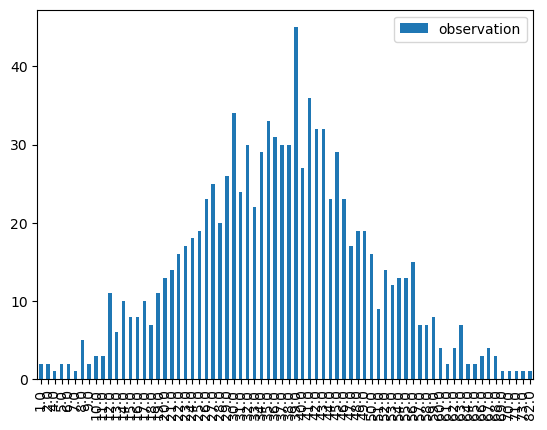

In [267]:
freq.plot(kind="bar")

In [ ]:
"""

around 30

"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [254]:
data.agg(['mean', 'std']).T 

,mean,std
observation,36.56,12.8165


In [ ]:
"""
not so far
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [255]:
ages_2=pd.read_csv("/Users/clemence/IRONHACK/Labs-Ironhack/module_2/Lab_4_Descriptive-Statistics/ages_population2.csv")
ages_2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [256]:
freq = pd.DataFrame(ages_2['observation'].value_counts())
print(freq) 

      observation
28.0          139
27.0          125
26.0          120
29.0          115
25.0           98
30.0           90
24.0           78
31.0           61
23.0           41
22.0           35
32.0           31
33.0           22
21.0           17
20.0           13
34.0            7
19.0            3
35.0            3
36.0            2


In [259]:
freq=freq.sort_index(axis = 0, ascending = True)

<AxesSubplot:>

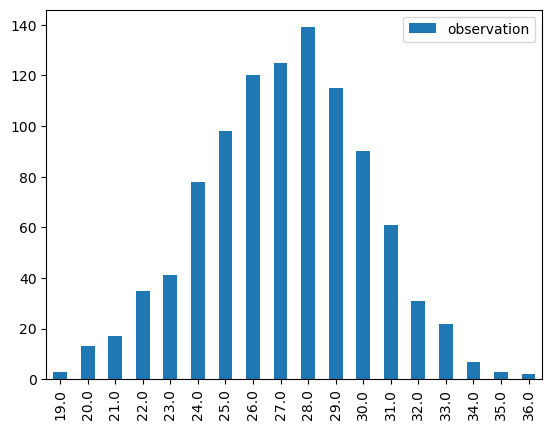

In [262]:
freq.plot(kind="bar")

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
there are both normal distributions
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [270]:
ages_2.agg(['mean', 'std']).T 

,mean,std
observation,27.155,2.969814


In [ ]:
"""
the standard deviation is really smaller than at step 2 because we have less values
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [271]:
age_pop=pd.read_csv("/Users/clemence/IRONHACK/Labs-Ironhack/module_2/Lab_4_Descriptive-Statistics/ages_population3.csv")
age_pop

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [272]:
freq = pd.DataFrame(age_pop['observation'].value_counts())
print(freq) 

      observation
32.0           37
35.0           31
37.0           31
39.0           29
36.0           26
...           ...
76.0            1
8.0             1
9.0             1
1.0             1
7.0             1

[75 rows x 1 columns]


<BarContainer object of 75 artists>

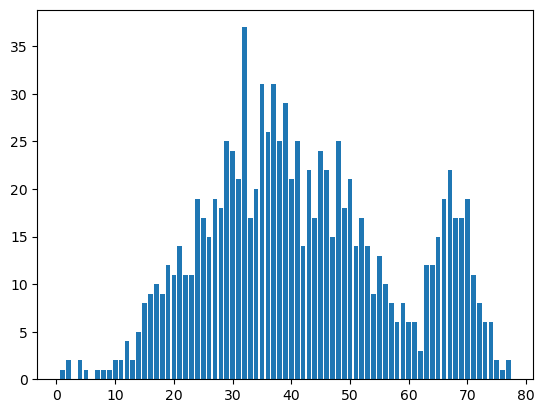

In [276]:
plt.bar(freq.index,freq["observation"])

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [277]:
age_pop.agg(['mean', 'std']).T 

,mean,std
observation,41.989,16.144706


In [278]:
data.agg(['mean', 'std']).T 

,mean,std
observation,36.56,12.8165


In [ ]:
"""
the mean is higher and the std is higher also, because the data are less concentred in the center values.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [279]:
age_pop.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
the median is higher than in step 1. The difference is tiny between mean and median. 
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [282]:
np.percentile(age_pop, 80)

57.0

In [ ]:
"""
there is a 20% of the values between 57 and 77, so it is over represented. 
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""